# Exploratory Data Analysis (Raw Data)

### ✅ Reasons to Use Noisy Data for EDA:


1. Understand the nature of the noise:

- EDA helps you identify common issues like:

    - Spelling mistakes

    - Irregular formatting

    - Emojis, HTML tags, special characters

    - Mixed languages or codes (e.g., English + slang)

    - Missing or malformed text

2. Decide on cleaning strategies:

- EDA informs what cleaning steps are necessary.

- For instance, if you see lots of URLs, you might decide to remove or normalize them.

3. Capture important patterns in raw data:

- Some "noise" may contain valuable information (e.g., hashtags, emojis in sentiment analysis).

- If you clean too early, you may lose insights.

### 🔄 Typical EDA Workflow on Text Data:

1. Start with raw (noisy) text

- Look at examples, character distribution, word frequency, etc.

2. Perform basic visualizations/statistics

- Length of text, word counts, vocabulary richness, etc.

3. Identify noise and data issues

- Detect outliers, empty entries, encoding issues.

4. Decide what to clean and retain

- Then apply cleaning based on your task (classification, clustering, sentiment, etc.).

5. Optionally re-run EDA after cleaning

- To see how your cleaning affected the dataset.

## Unzipping Data

In [1]:
import os
os.getcwd()

'/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/bbc-news-sorting/notebooks'

In [2]:
# importing the zipfile module 
from zipfile import ZipFile 
import os
# loading the temp.zip and creating a zip object 
with ZipFile(os.path.join(os.getcwd() ,"data/learn-ai-bbc.zip"), 'r') as zObject: 
	# Extracting all the members of the zip 
	# into a specific location. 
	zObject.extractall(path=os.path.join(os.getcwd(), "data")) 


In [3]:
import pandas as pd
import numpy as np

## Load the Dataset

In [4]:
DATA_PATH = os.path.join(os.getcwd(), "data")
# print(DATA_PATH)

In [5]:
train_df = pd.read_csv(os.path.join(DATA_PATH, "BBC News Train.csv"))
train_df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [6]:
test_df = pd.read_csv(os.path.join(DATA_PATH, "BBC News Test.csv"))
test_df.head()

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


## Data Columns

The "Text" column contains the textual information(input features) and the "Category" column contains the output labels. The task of any classifier is to correctly predict the "Category" given any "Text" or textual column. Hence we have to apply our data cleaning, transformation steps to the "Text" column.

## Validating the number of entries

This includes the number of entries we have in the dataset. Also we can have an analysis on the statistical aspects of the data which we will be exploring further through graphs and charts.

In [7]:
len(train_df), train_df.index.shape[-1]

(1490, 1490)

In [41]:
len(test_df), test_df.index.shape[-1]

(735, 735)

## Analysisng Text Data

In [9]:
# for processing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# for eavluation
from sklearn import preprocessing, metrics, manifold
# for features
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict
# to handle imbalance cxategories
from imblearn.over_sampling import ADASYN, SMOTE
from imblearn.under_sampling import NearMiss

# algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# ensemble methods
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# visualization
import collections
from collections import Counter, defaultdict
import matplotlib.patches as mpatches
from sklearn.metrics import accuracy_score
%matplotlib inline

from sklearn.preprocessing import RobustScaler
import xgboost
import string
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords

# Download stopwords (only need to do this once)
nltk.download('stopwords')
import re
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rahulshelke/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
## Assess the shape of the data
print("The Shape of the Dataset".format(), train_df.shape)

The Shape of the Dataset (1490, 3)


In [10]:
train_df["Category"].unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

## Statistical Analysis-I

This is the start of the analysis phase where we will first check the amount of data present in either of the categories. 
We will follow this up with some pictorial representations related to the words and frequency mappings.


In [11]:
bussiness = train_df[train_df["Category"]=="business"]["Text"]
tech = train_df[train_df["Category"]=="tech"]["Text"]
politics = train_df[train_df["Category"]=="politics"]["Text"]
sport = train_df[train_df["Category"]=="sport"]["Text"]
entertainment = train_df[train_df["Category"]=="entertainment"]["Text"]

print("First 10 samples of businees relates news samples\n".format(), bussiness[:10])
print()
print("First 10 samples of tech relates news samples\n".format(), tech[:10])
print()
print("First 10 samples of politics relates news samples\n".format(), politics[:10])
print()
print("First 10 samples of sport relates news samples\n".format(), sport[:10])
print()
print("First 10 samples of entertainment relates news samples\n".format(), entertainment[:10])

First 10 samples of businees relates news samples
 0     worldcom ex-boss launches defence lawyers defe...
1     german business confidence slides german busin...
2     bbc poll indicates economic gloom citizens in ...
4     enron bosses in $168m payout eighteen former e...
8     car giant hit by mercedes slump a slump in pro...
12    uk coal plunges into deeper loss shares in uk ...
13    bp surges ahead on high oil price oil giant bp...
25    china had role in yukos split-up china lent ru...
29    iran budget seeks state sell-offs iran s presi...
32    china continues rapid growth china s economy h...
Name: Text, dtype: object

First 10 samples of tech relates news samples
 3     lifestyle  governs mobile choice  faster  bett...
19    moving mobile improves golf swing a mobile pho...
24    bt boosts its broadband packages british telec...
26    peer-to-peer nets  here to stay  peer-to-peer ...
30    pompeii gets digital make-over the old-fashion...
39    security scares spark browser

In [12]:
# Count of all categories text
count = train_df["Category"].value_counts()
print("Total Counts of all sets".format(), count)

Total Counts of all sets Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64


In [13]:
for label, count in enumerate(dict(count)):
    print(label, count,)

0 sport
1 business
2 politics
3 entertainment
4 tech


In [14]:
dict(train_df["Category"].value_counts(ascending=False)).keys()

dict_keys(['sport', 'business', 'politics', 'entertainment', 'tech'])

## Category Wise Count

<Axes: xlabel='count', ylabel='Category'>

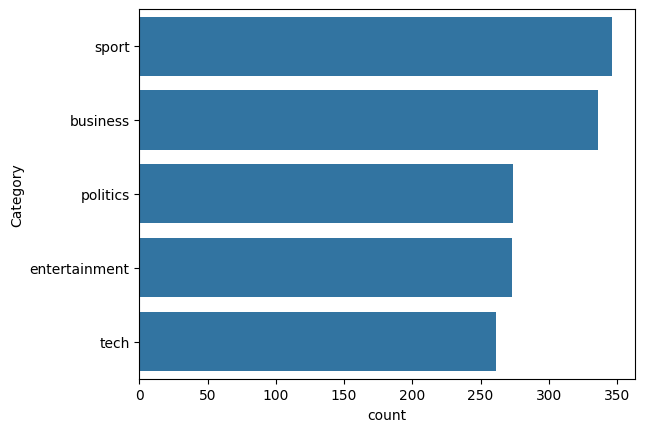

In [15]:
sns.countplot(train_df, y='Category', order=dict(train_df["Category"].value_counts(ascending=False)).keys())

## # of tokens distribution per category

In [16]:
train_df['Token_length']=train_df["Text"].apply(lambda x: len(x.split()))

<Axes: xlabel='Token_length', ylabel='Category'>

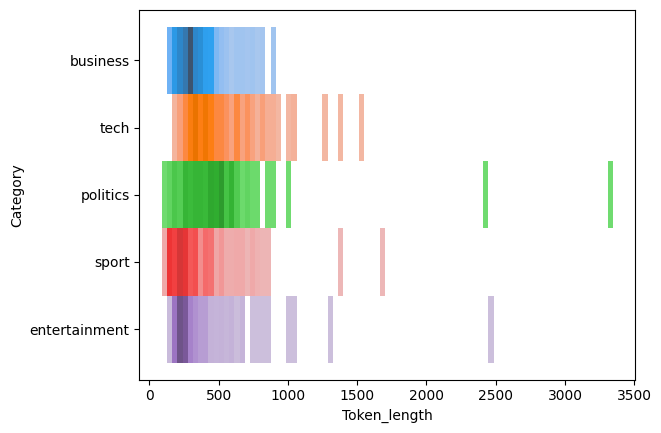

In [17]:
sns.histplot(
    train_df, x="Token_length", y="Category", hue="Category", legend=False
)

In [18]:
train_df["Token_length"].describe()

count    1490.000000
mean      385.012752
std       210.898616
min        90.000000
25%       253.000000
50%       337.000000
75%       468.750000
max      3345.000000
Name: Token_length, dtype: float64

- 75% of data has length of ~500 tokens
- if we focus on token lengths, there are outliers, greater than 1000 tokens .


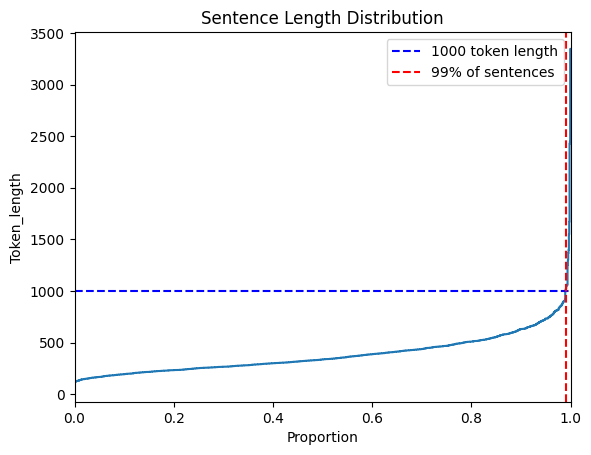

In [19]:
sns.ecdfplot(data=train_df, y="Token_length")
plt.axhline(y=1000, color='b', linestyle='--', label="1000 token length")
plt.axvline(x=0.99, color='r', linestyle='--', label="99% of sentences")

plt.title("Sentence Length Distribution")
plt.legend()
plt.show()

- this confirms the outliers, will discard those, as they are 1% of the data

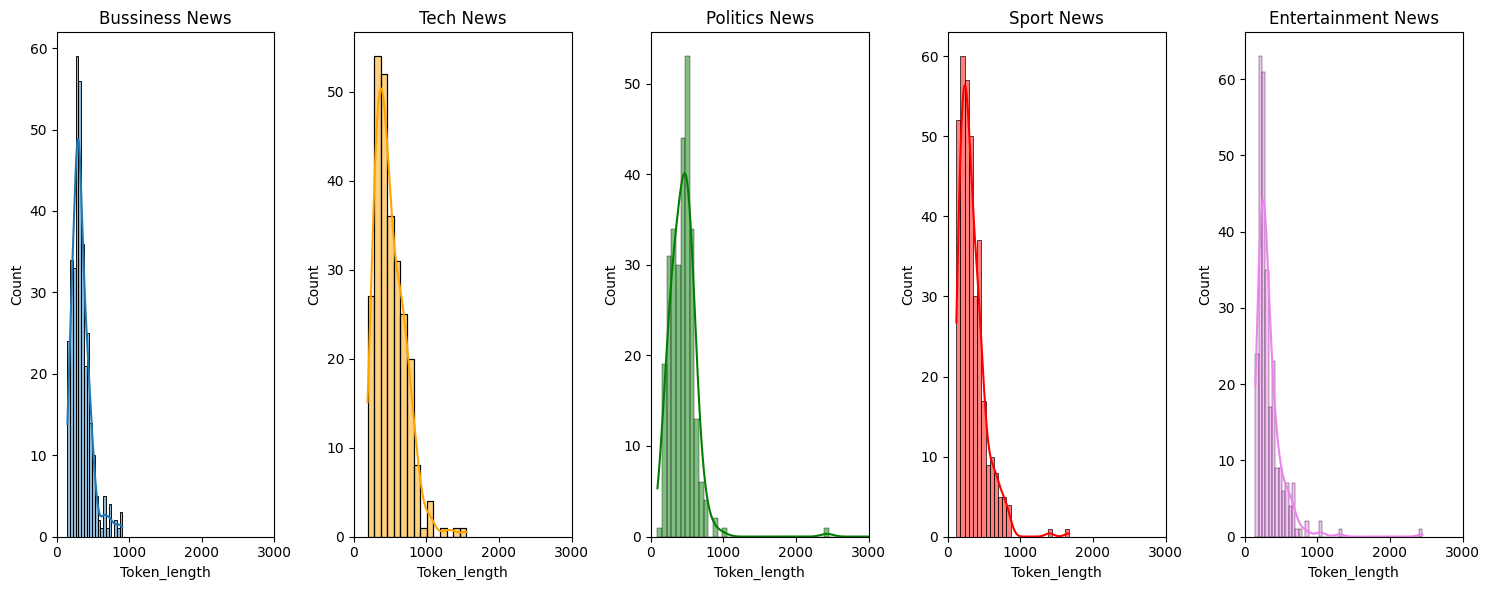

In [20]:
plt.subplots(1, 5, figsize=(15,6))
#bussiness
plt.subplot(151)
sns.histplot(data=train_df[train_df['Category'] == 'business'], x='Token_length', kde=True)
plt.xlim(0,3000)
plt.title('Bussiness News')

#tech
plt.subplot(152)
sns.histplot(data=train_df[train_df['Category'] == 'tech'], x='Token_length', kde=True, color='orange')
plt.xlim(0,3000)
plt.title('Tech News')

#politics
plt.subplot(153)
sns.histplot(data=train_df[train_df['Category'] == 'politics'], x='Token_length', kde=True, color='green')
plt.xlim(0,3000)
plt.title('Politics News')

#sport
plt.subplot(154)
sns.histplot(data=train_df[train_df['Category'] == 'sport'], x='Token_length', kde=True, color='red')
plt.xlim(0,3000)
plt.title('Sport News')

#entertainment
plt.subplot(155)
sns.histplot(data=train_df[train_df['Category'] == 'entertainment'], x='Token_length', kde=True, color='violet')
plt.xlim(0,3000)
plt.title('Entertainment News')

plt.tight_layout()
plt.show();

## Punctuation count distribution

In [21]:
# Count Punctuations/Stopwords/Codes and other semantic datatypes

train_df["Count_punctuations"] = train_df["Text"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

In [22]:
train_df.describe()

,ArticleId,Token_length,Count_punctuations
count,1490.000000,1490.000000,1490.000000
mean,1119.696644,385.012752,29.830201
std,641.826283,210.898616,18.448157
min,2.000000,90.000000,6.000000
25%,565.250000,253.000000,19.000000
50%,1112.500000,337.000000,26.000000
75%,1680.750000,468.750000,36.000000
max,2224.000000,3345.000000,216.000000


### Punctuation distribution over data

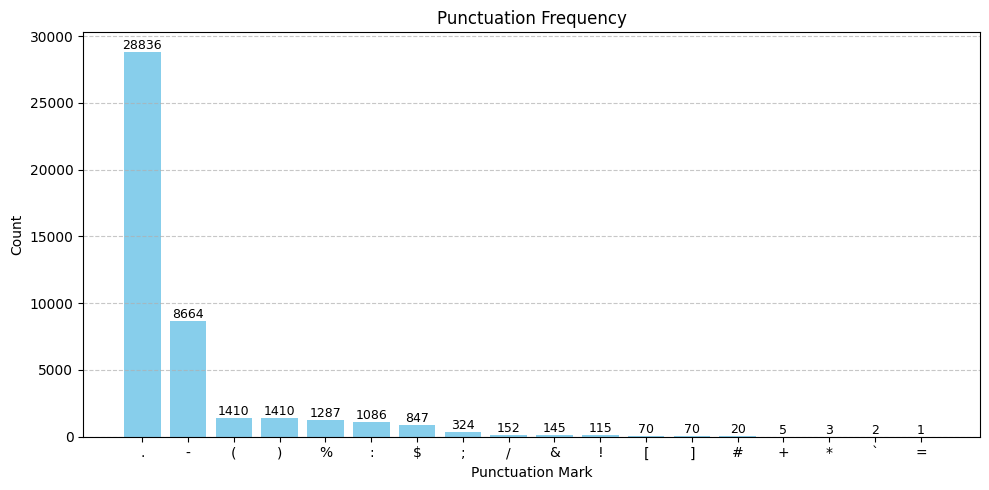

In [28]:
# Count punctuation
punctuation_chars = string.punctuation
punct_counts = Counter(char for text in train_df["Text"] for char in str(text) if char in punctuation_chars)

# Sort by frequency
punct_counts = dict(sorted(punct_counts.items(), key=lambda x: x[1], reverse=True))

# Plotting with count labels
plt.figure(figsize=(10, 5))
bars = plt.bar(punct_counts.keys(), punct_counts.values(), color='skyblue')
plt.title("Punctuation Frequency")
plt.xlabel("Punctuation Mark")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

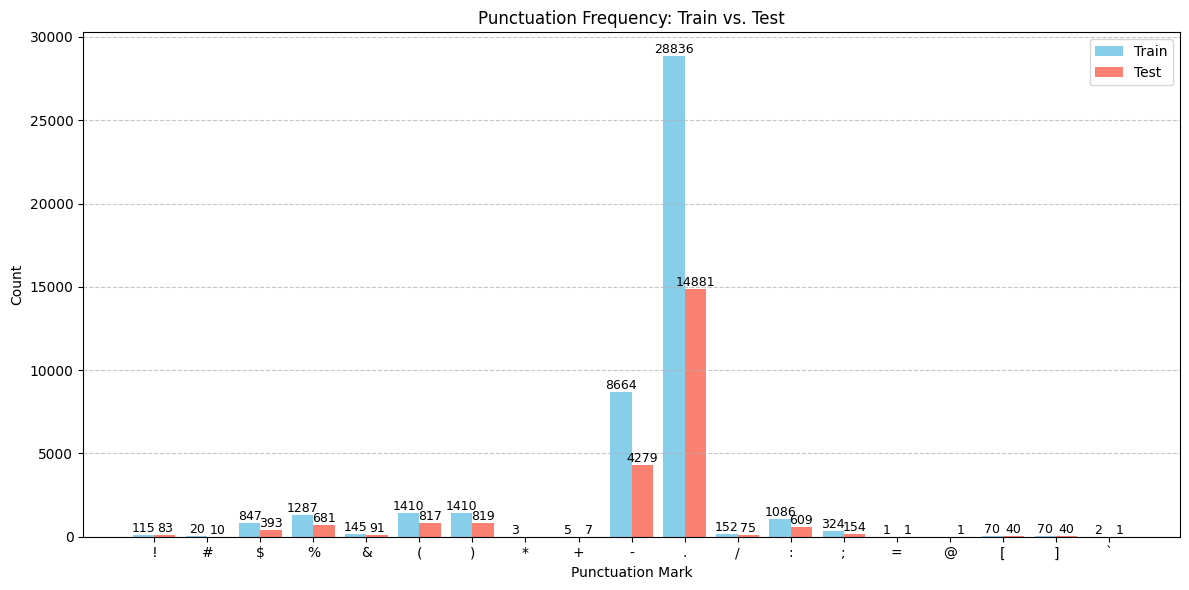

In [48]:
# Count punctuation in train
train_punct_counts = Counter(char for text in train_df["Text"] for char in str(text) if char in string.punctuation)

# Count punctuation in test
test_punct_counts = Counter(char for text in test_df["Text"] for char in str(text) if char in string.punctuation)

# Combine all punctuation marks from both datasets
all_puncts = sorted(set(train_punct_counts.keys()).union(set(test_punct_counts.keys())))

# Create aligned count lists
train_counts = [train_punct_counts.get(p, 0) for p in all_puncts]
test_counts = [test_punct_counts.get(p, 0) for p in all_puncts]

# Plotting
x = range(len(all_puncts))
bar_width = 0.4

plt.figure(figsize=(12, 6))
bars1 = plt.bar([i - bar_width/2 for i in x], train_counts, width=bar_width, color='skyblue', label='Train')
bars2 = plt.bar([i + bar_width/2 for i in x], test_counts, width=bar_width, color='salmon', label='Test')

plt.title("Punctuation Frequency: Train vs. Test")
plt.xlabel("Punctuation Mark")
plt.ylabel("Count")
plt.xticks(ticks=x, labels=all_puncts)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{int(height)}',
                     ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

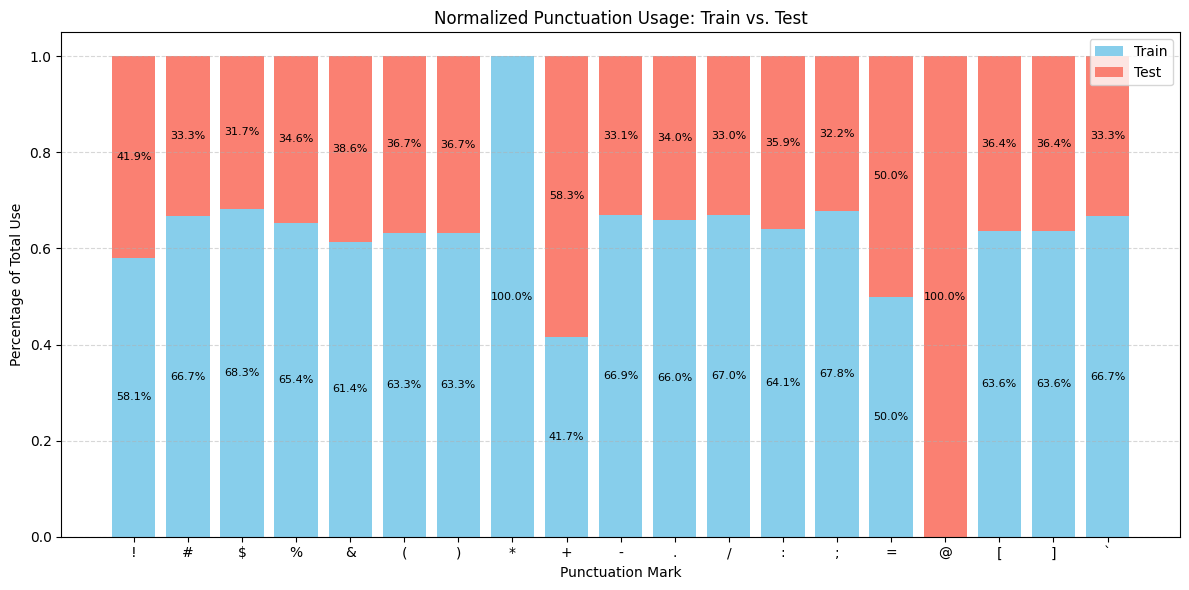

In [49]:
# Create DataFrame for easy manipulation
data = {
    'Punctuation': all_puncts,
    'Train': [train_punct_counts.get(p, 0) for p in all_puncts],
    'Test': [test_punct_counts.get(p, 0) for p in all_puncts]
}
df = pd.DataFrame(data)

# Normalize to percentage
df['Total'] = df['Train'] + df['Test']
df['Train_norm'] = df['Train'] / df['Total']
df['Test_norm'] = df['Test'] / df['Total']

# Plotting
plt.figure(figsize=(12, 6))
bottoms = df['Train_norm']
plt.bar(df['Punctuation'], bottoms, label='Train', color='skyblue')
plt.bar(df['Punctuation'], df['Test_norm'], bottom=bottoms, label='Test', color='salmon')

# Add percent labels
for idx, row in df.iterrows():
    if row['Train_norm'] > 0:
        plt.text(row.name, row['Train_norm']/2, f"{row['Train_norm']*100:.1f}%", ha='center', va='center', fontsize=8)
    if row['Test_norm'] > 0:
        plt.text(row.name, row['Train_norm'] + row['Test_norm']/2, f"{row['Test_norm']*100:.1f}%", ha='center', va='center', fontsize=8)

plt.title("Normalized Punctuation Usage: Train vs. Test")
plt.ylabel("Percentage of Total Use")
plt.xlabel("Punctuation Mark")
plt.ylim(0, 1.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Punctuation distribution over categories

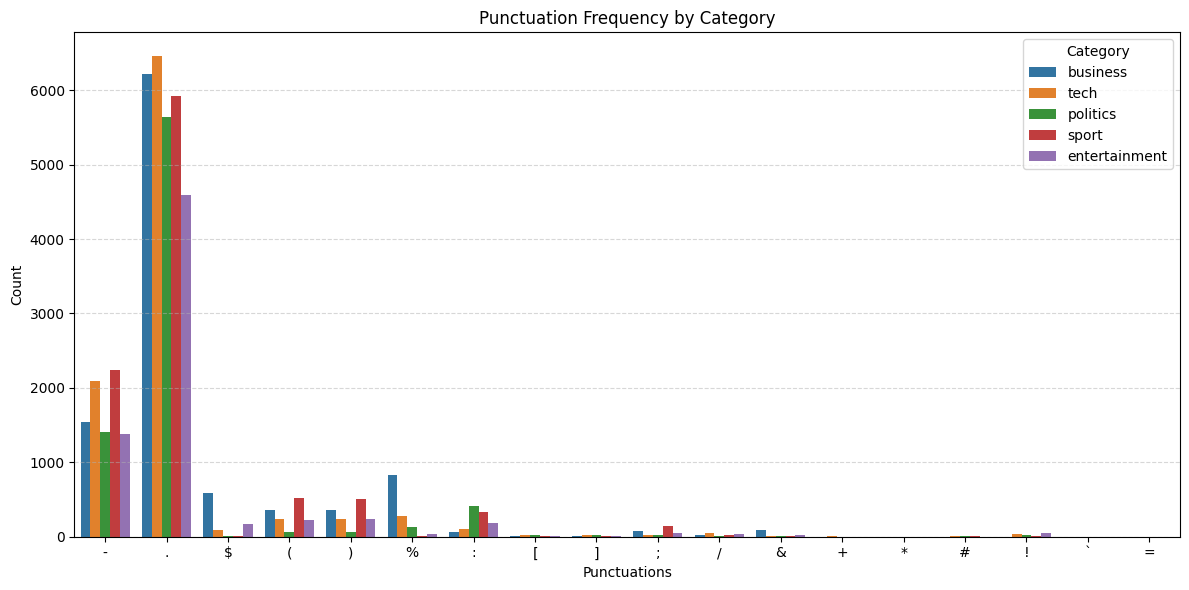

In [26]:
# Initialize result dictionary
punct_by_category = {}

# Loop through categories
for cat in train_df['Category'].unique():
    text_block = ' '.join(train_df[train_df['Category'] == cat]['Text'].dropna().astype(str))
    punct_counts = Counter(char for char in text_block if char in string.punctuation)
    punct_by_category[cat] = punct_counts

# Convert to DataFrame for plotting
punct_df = pd.DataFrame(punct_by_category).fillna(0).astype(int)
punct_df = punct_df.reset_index().melt(id_vars='index', var_name='Category', value_name='Count')
punct_df.rename(columns={'index': 'Punctuation'}, inplace=True)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=punct_df, x='Punctuation', y='Count', hue='Category')
plt.title("Punctuation Frequency by Category")
plt.ylabel("Count")
plt.xlabel("Punctuations")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Category")
plt.tight_layout()
plt.show()

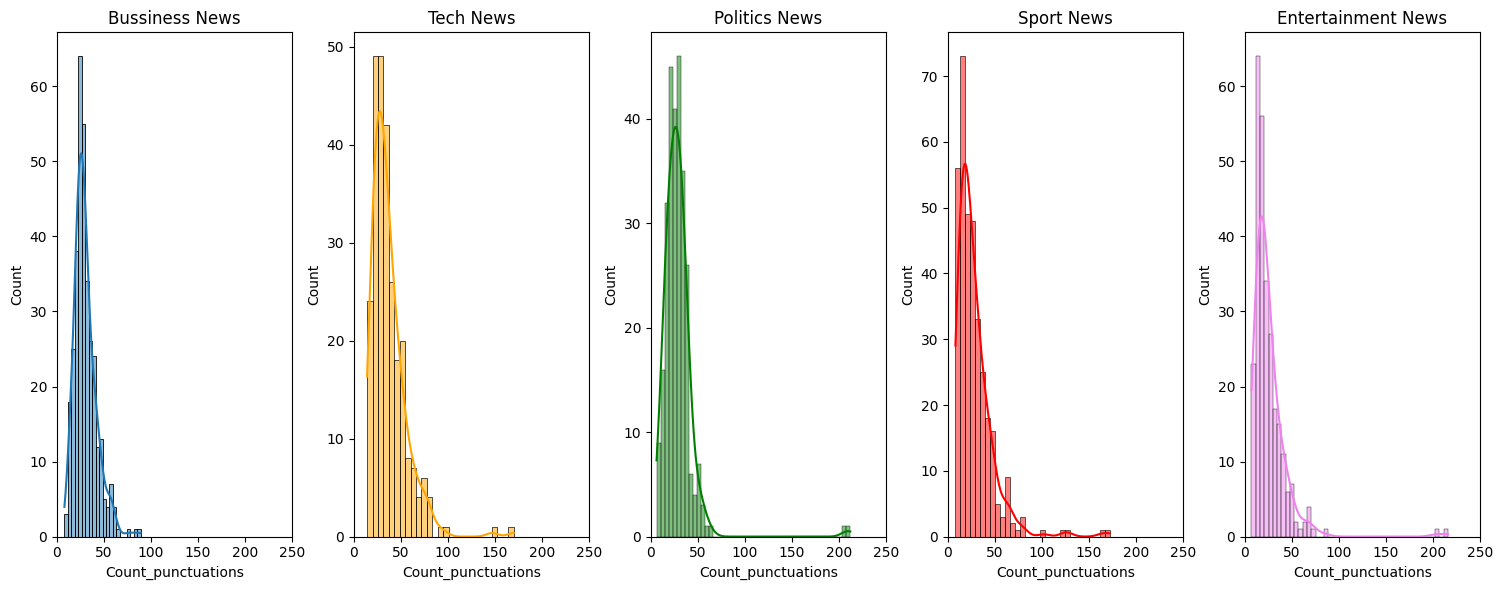

In [27]:
# punctuation counts

plt.subplots(1, 5, figsize=(15,6))
#bussiness
plt.subplot(151)
sns.histplot(data=train_df[train_df['Category'] == 'business'], x='Count_punctuations', kde=True)
plt.xlim(0,250)
plt.title('Bussiness News')

#tech
plt.subplot(152)
sns.histplot(data=train_df[train_df['Category'] == 'tech'], x='Count_punctuations', kde=True, color='orange')
plt.xlim(0,250)
plt.title('Tech News')

#politics
plt.subplot(153)
sns.histplot(data=train_df[train_df['Category'] == 'politics'], x='Count_punctuations', kde=True, color='green')
plt.xlim(0,250)
plt.title('Politics News')

#sport
plt.subplot(154)
sns.histplot(data=train_df[train_df['Category'] == 'sport'], x='Count_punctuations', kde=True, color='red')
plt.xlim(0,250)
plt.title('Sport News')

#entertainment
plt.subplot(155)
sns.histplot(data=train_df[train_df['Category'] == 'entertainment'], x='Count_punctuations', kde=True, color='violet')
plt.xlim(0,250)
plt.title('Entertainment News')

plt.tight_layout()
plt.show();

## Stop word count distribution

In [44]:
# Analyse Stopwords

stops = set(STOPWORDS)

train_df["Stop_words"] = train_df["Text"].apply(lambda z: len([w for w in str(z).split() if w in stops]))

test_df["Stop_words"] = test_df["Text"].apply(lambda z: len([w for w in str(z).split() if w in stops]))

In [45]:
print(f"Total Stop Words (Train): {train_df['Stop_words'].sum()}")
print(f"Total Stop Words (Test): {test_df['Stop_words'].sum()}")

Total Stop Words (Train): 235572
Total Stop Words (Test): 122006


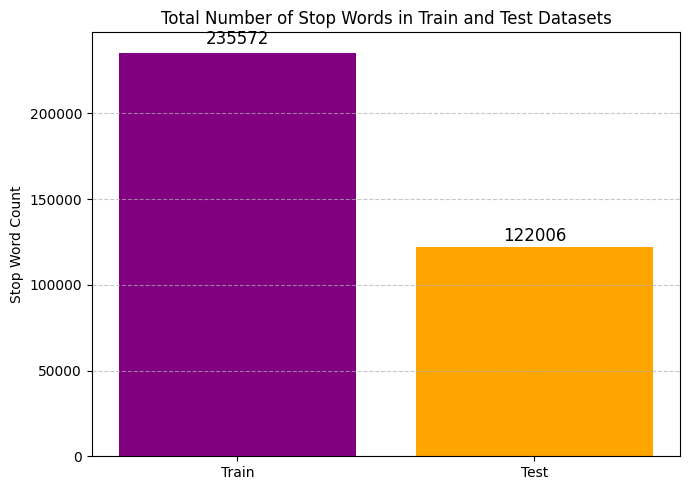

In [46]:
# Total stopword count in each dataset
total_stopwords_train = train_df["Stop_words"].sum()
total_stopwords_test = test_df["Stop_words"].sum()

# Plotting
plt.figure(figsize=(7, 5))
bars = plt.bar(['Train', 'Test'], [total_stopwords_train, total_stopwords_test], color=['purple', 'orange'])
plt.title("Total Number of Stop Words in Train and Test Datasets")
plt.ylabel("Stop Word Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + height * 0.01, f'{int(height)}', 
             ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()

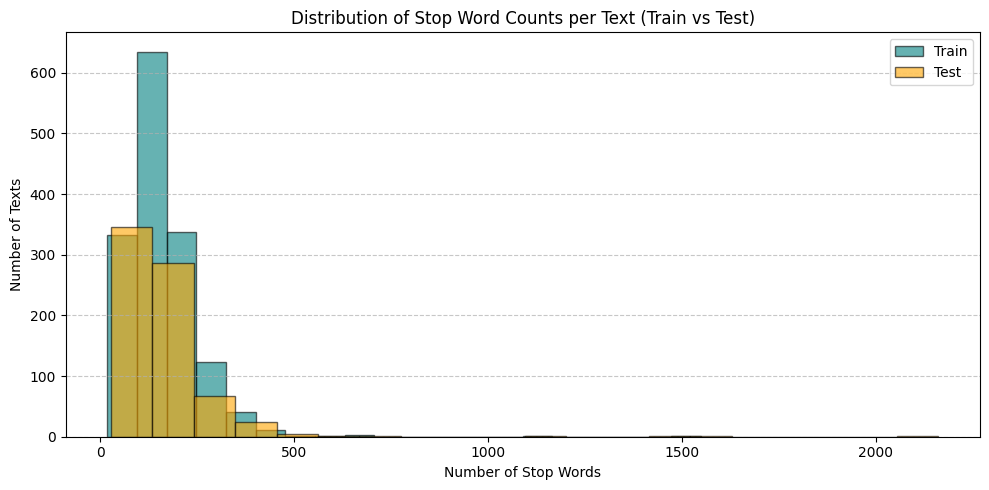

In [50]:
plt.figure(figsize=(10, 5))
plt.hist(train_df["Stop_words"], bins=20, alpha=0.6, label='Train', color='teal', edgecolor='black')
plt.hist(test_df["Stop_words"], bins=20, alpha=0.6, label='Test', color='orange', edgecolor='black')

plt.title("Distribution of Stop Word Counts per Text (Train vs Test)")
plt.xlabel("Number of Stop Words")
plt.ylabel("Number of Texts")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [35]:
train_df.describe()

,ArticleId,Label,Token_length,Count_punctuations,Stop_words
count,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000
mean,1119.696644,1.972483,385.012752,29.830201,158.102013
std,641.826283,1.429299,210.898616,18.448157,95.867152
min,2.000000,0.000000,90.000000,6.000000,18.000000
25%,565.250000,1.000000,253.000000,19.000000,98.000000
50%,1112.500000,2.000000,337.000000,26.000000,136.000000
75%,1680.750000,3.000000,468.750000,36.000000,199.000000
max,2224.000000,4.000000,3345.000000,216.000000,1549.000000


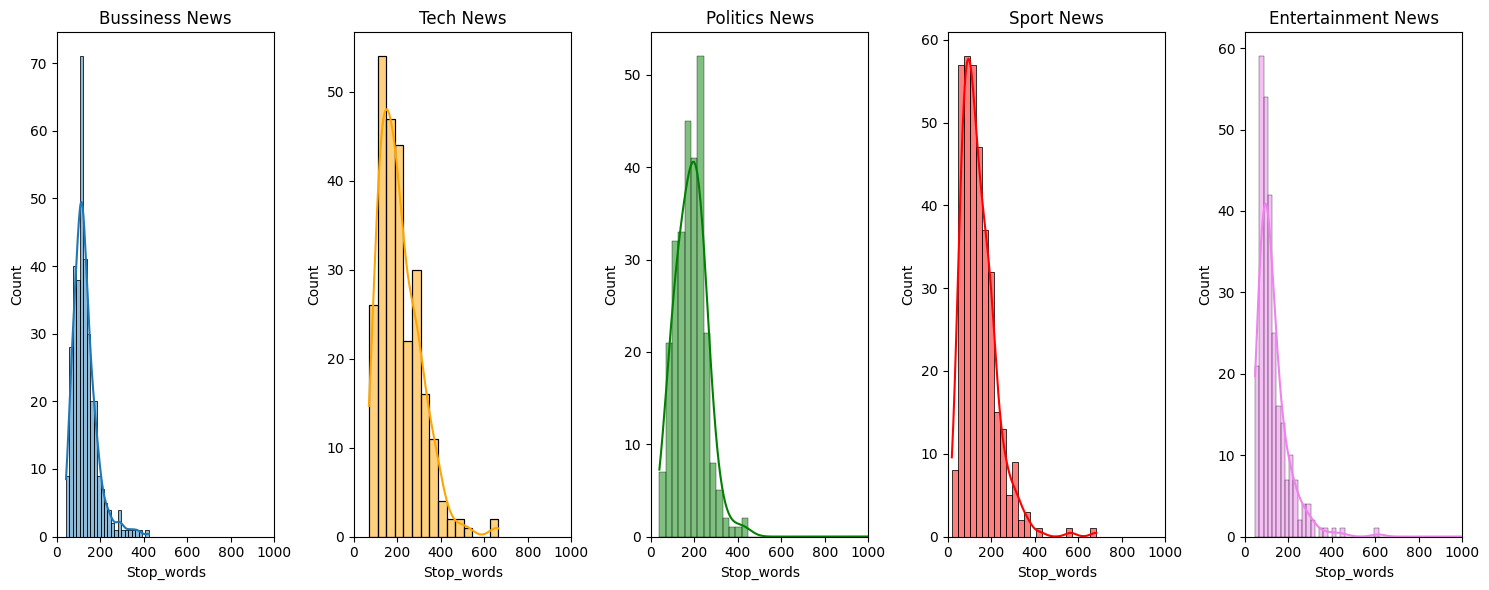

In [51]:
# punctuation counts

plt.subplots(1, 5, figsize=(15,6))
#bussiness
plt.subplot(151)
sns.histplot(data=train_df[train_df['Category'] == 'business'], x='Stop_words', kde=True)
plt.xlim(0,1000)
plt.title('Bussiness News')

#tech
plt.subplot(152)
sns.histplot(data=train_df[train_df['Category'] == 'tech'], x='Stop_words', kde=True, color='orange')
plt.xlim(0,1000)
plt.title('Tech News')

#politics
plt.subplot(153)
sns.histplot(data=train_df[train_df['Category'] == 'politics'], x='Stop_words', kde=True, color='green')
plt.xlim(0,1000)
plt.title('Politics News')

#sport
plt.subplot(154)
sns.histplot(data=train_df[train_df['Category'] == 'sport'], x='Stop_words', kde=True, color='red')
plt.xlim(0,1000)
plt.title('Sport News')

#entertainment
plt.subplot(155)
sns.histplot(data=train_df[train_df['Category'] == 'entertainment'], x='Stop_words', kde=True, color='violet')
plt.xlim(0,1000)
plt.title('Entertainment News')

plt.tight_layout()
plt.show();

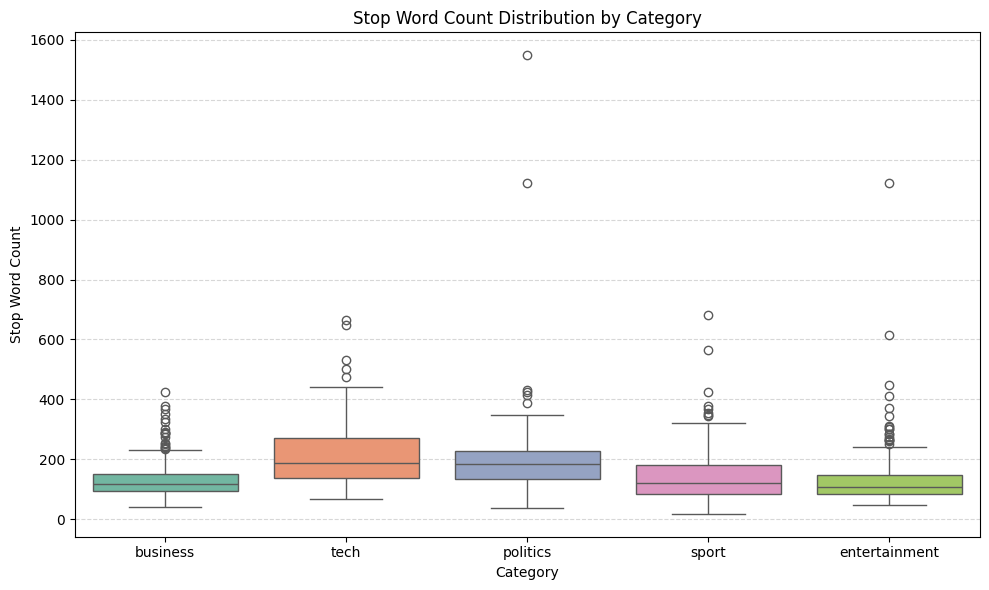

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, x='Category', y='Stop_words', palette='Set2')
plt.title("Stop Word Count Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Stop Word Count")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Number of URL's count distribution

In [52]:
## Checking number of urls

train_df["No_of_urls"] = train_df["Text"].apply(lambda z: len([w for w in str(z).lower().split() if 'http' in w or 'https' in w]))

In [53]:
train_df.describe()

,ArticleId,Token_length,Count_punctuations,Stop_words,No_of_urls
count,1490.000000,1490.000000,1490.000000,1490.000000,1490.0
mean,1119.696644,385.012752,29.830201,158.102013,0.0
std,641.826283,210.898616,18.448157,95.867152,0.0
min,2.000000,90.000000,6.000000,18.000000,0.0
25%,565.250000,253.000000,19.000000,98.000000,0.0
50%,1112.500000,337.000000,26.000000,136.000000,0.0
75%,1680.750000,468.750000,36.000000,199.000000,0.0
max,2224.000000,3345.000000,216.000000,1549.000000,0.0


### WordClound Visualization

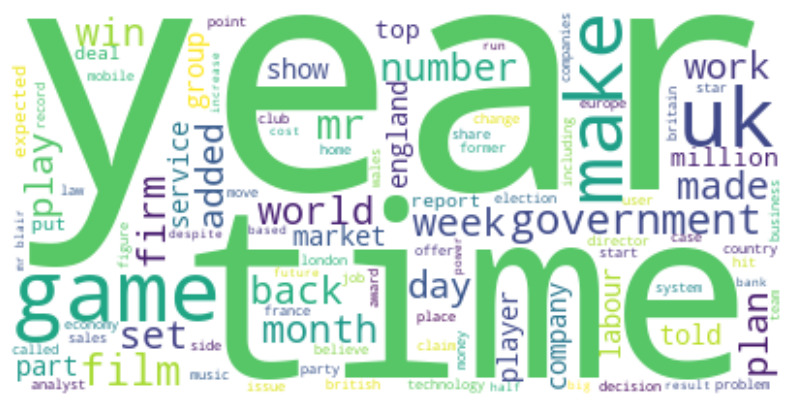

In [39]:
#WordCloud Visualizations
#Method for creating wordclouds
from PIL import Image

def display_cloud(data):
    """
    Generates and displays a word cloud based on input text data with a specified image mask and contour color.

    This function uses the WordCloud library to generate a visual representation of word frequencies in the 
    input text data. The word cloud is displayed using matplotlib, and it can be customized with an image 
    mask (if provided), background color, contour width, and contour color.

    Parameters:
    -----------
    data : pd.Series
        The input text data to be used for generating the word cloud. It can be a list of words or a single 
        string of text. The words in the input will be tokenized and used to determine the size of each word 
        in the cloud based on frequency.
    
    img_path : str
        The file path to an image that can be used as a mask for the word cloud shape. This image will dictate 
        the form of the word cloud. If not needed, this parameter can be left commented out or set to None 
        (currently not used in this version).

    color : str
        The color to be used for the contour of the word cloud. The contour color will be applied around 
        the edges of the cloud. Typical values could be any valid Matplotlib color (e.g., 'blue', 'red', 
        'green', etc.).

    Returns:
    --------
    None
        The function does not return anything. It generates a word cloud and displays it using matplotlib.
    """
    plt.subplots(figsize=(10,10))
    wc = WordCloud(stopwords=stopwords.words(),
                   background_color="white",
                   max_words=2000, max_font_size=256,
                   random_state=42, 
                   )
    wc.generate(' '.join(data))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.show()
    
display_cloud(train_df['Text'])

In [40]:
train_df.columns

Index(['ArticleId', 'Text', 'Category', 'Clean_text', 'Label', 'Token_length',
       'Count_punctuations', 'Stop_words', 'No_of_urls'],
      dtype='object')

In [41]:
train_df["Category"].unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

WordCloud for : business


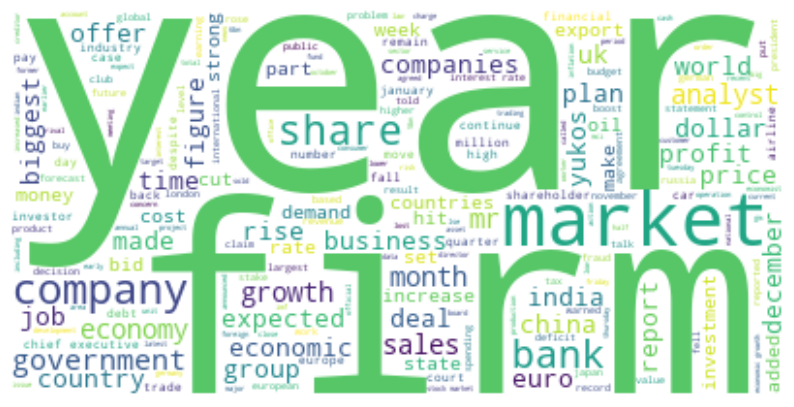

WordCloud for : tech


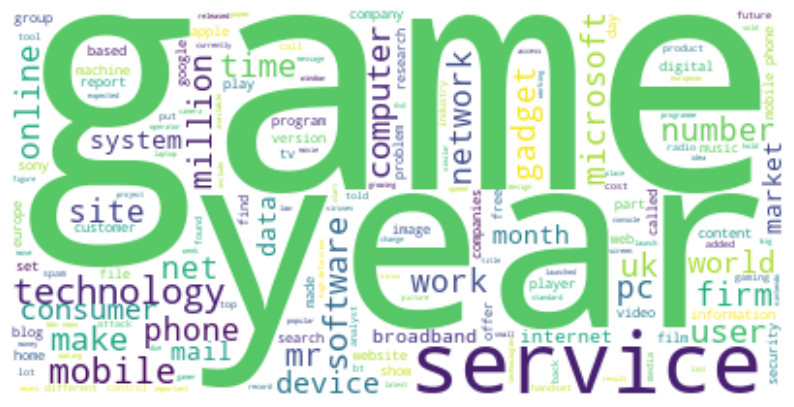

WordCloud for : politics


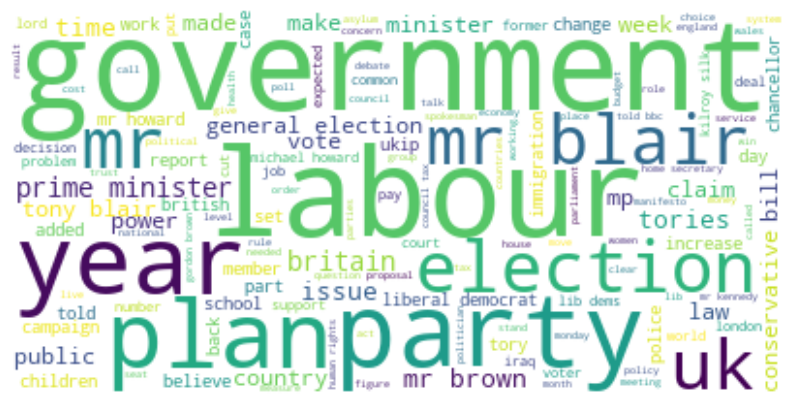

WordCloud for : sport


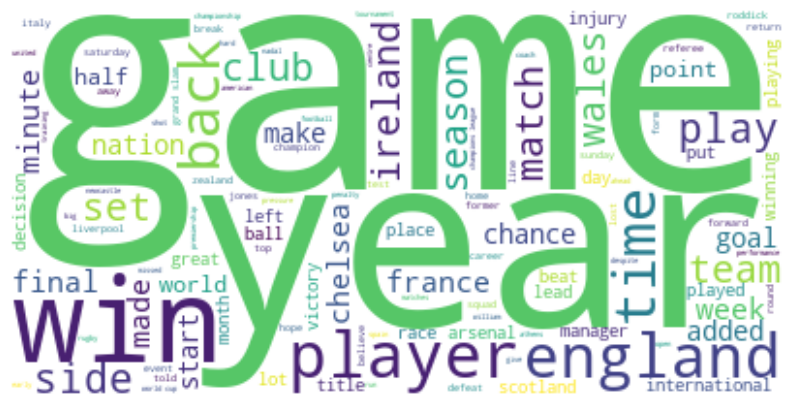

WordCloud for : entertainment


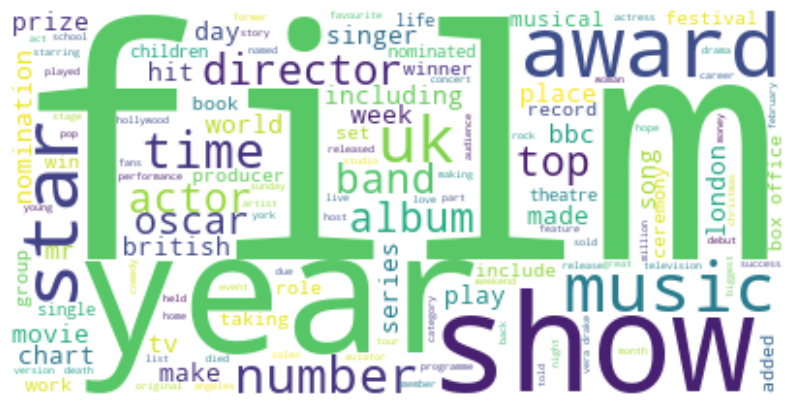

In [42]:
for category in train_df["Category"].unique():
    print(f"WordCloud for : {category}")
    display_cloud(train_df[train_df['Category'] == category]["Text"])

### Simplified Top 100 Word Count

In [43]:
#Simplified counter function
def create_corpus(word):
    corpus=[]
    
    for x in train_df[train_df['Category']==word]['Text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

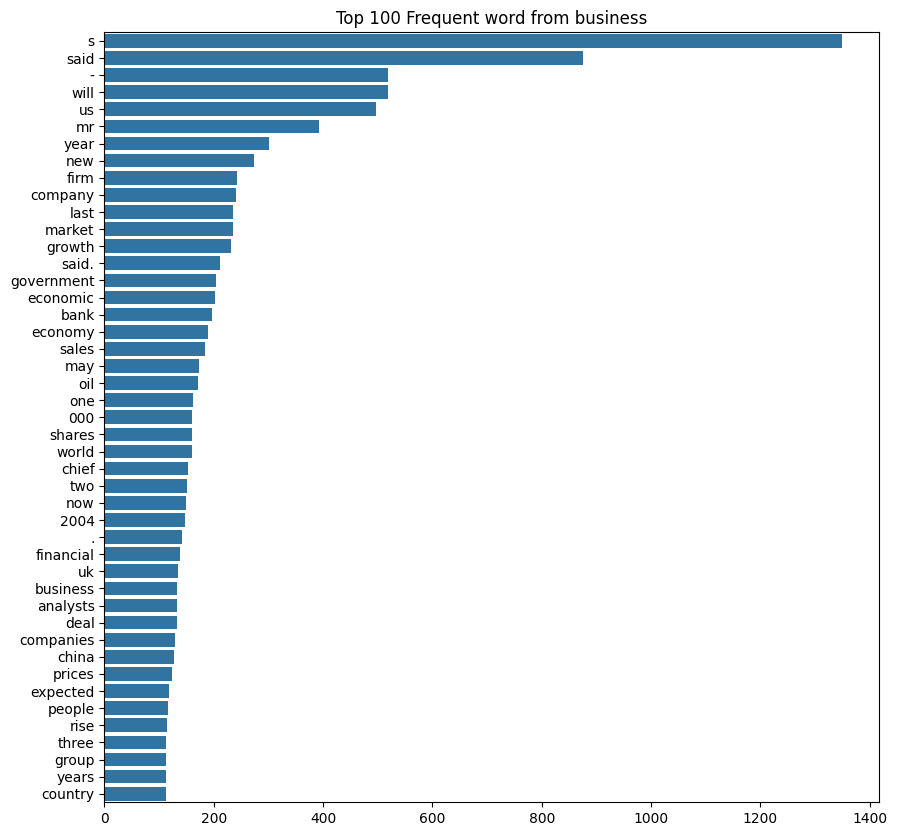

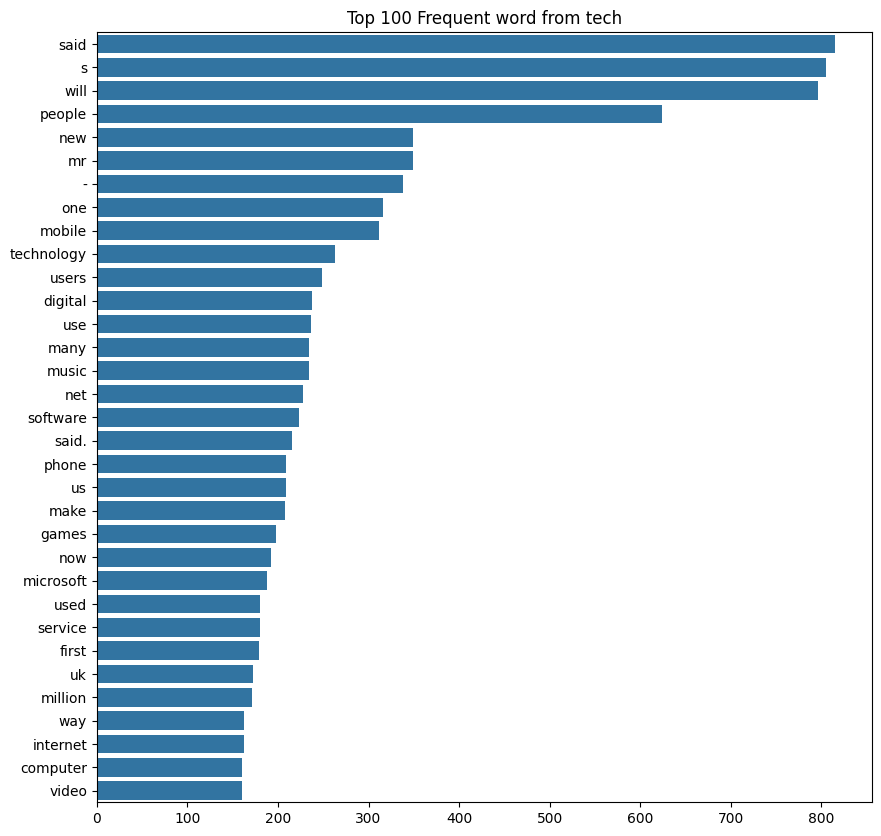

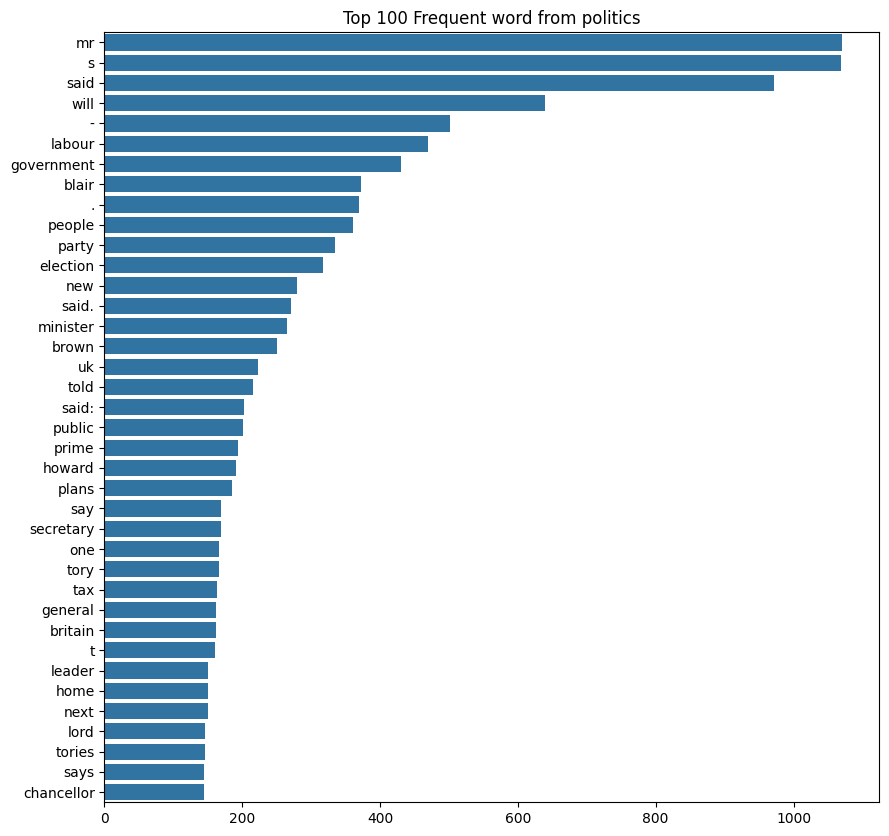

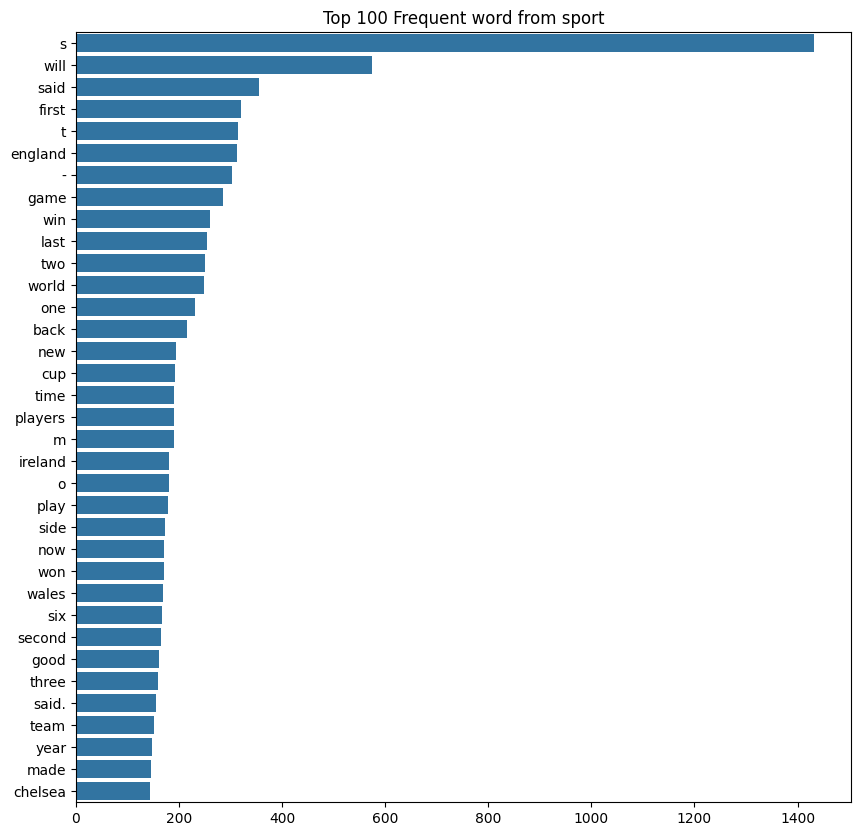

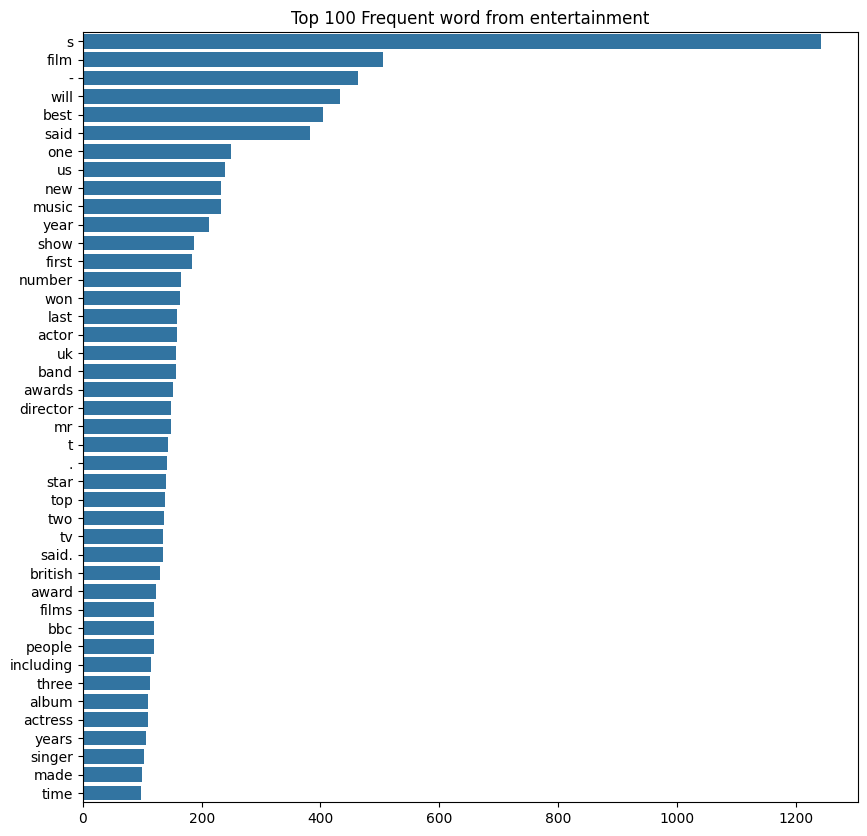

In [44]:
for category in train_df["Category"].unique():
    corpus=create_corpus(category)
    counter=Counter(corpus)
    most=counter.most_common()
    x=[]
    y=[]
    for word,count in most[:100]:
        if (word not in stops) :
            x.append(word)
            y.append(count)
    plt.figure(figsize=(10, 10))
    plt.title(f"Top 100 Frequent word from {category}")
    sns.barplot(x=y,y=x)
    plt.show();

## Inference From Analysis -I

The following can be inferred from the data:

- The dataset is balanced.
- The dataset contains equal number of semantics for reviews all categories.
- The dataset contains redundant words.
- Punctuations/stopwords are present in a equal distribution in the dataset.

This tells us that we have to do lots of cleaning!


## Statistical Analysis-II

In this context , we will be exploring further into the analysis part. This would allow us to have a better idea which part of the data requires removal and which part can be transformed before applying any model on it.

Here we will be looking into:

- [Gram Statistics](https://albertauyeung.github.io/2018/06/03/generating-ngrams.html)

Gram analysis is an essential tool which forms the base of preparing a common bag of words model containing relevant data. This process implies that we are taking into consideration which words are present in conjunction with other words with a maximum frequency in the dataset. Grams can be n-ary implying that we can have many gram analysis taking n-words together.For example: a Ternary Gram Analysis(Tri-gram) includes analysing sentences which have 3 words occuring together at a higher frequency.

A detailed image of a ternary gram analysis using a famous example is provided:

<img src="https://miro.medium.com/max/536/1*vZhxrBkCz-yN_rzZBqSKiA.png">

Another example is also provided:


<img src="https://images.deepai.org/glossary-terms/867de904ba9b46869af29cead3194b6c/8ARA1.png">



In [49]:
#Gram analysis on Training set- Bigram and Trigram
stopword=set(stopwords.words('english'))

def gram_analysis(data,gram):
    tokens=[t for t in data.lower().split(" ") if t!="" if t not in stopword]
    ngrams=zip(*[tokens[i:] for i in range(gram)])
    final_tokens=[" ".join(z) for z in ngrams]
    return final_tokens


#Create frequency grams for analysis
    
def create_dict(data,grams):
    freq_dict=defaultdict(int)
    for sentence in data:
        for tokens in gram_analysis(sentence,grams):
            freq_dict[tokens]+=1
    return freq_dict

def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["N_gram_words"].values[::-1],
        x=df["N_gram_frequency"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace



def create_new_df(freq_dict,):
    freq_df=pd.DataFrame(sorted(freq_dict.items(),key=lambda z:z[1])[::-1])
    freq_df.columns=['N_gram_words','N_gram_frequency']
    #print(freq_df.head())
    #plt.barh(freq_df['n_gram_words'][:20],freq_df['n_gram_frequency'][:20],linewidth=0.3)
    #plt.show()
    trace=horizontal_bar_chart(freq_df[:20],'orange')
    return trace
    
def plot_grams(
    freq_train_df_business,
    freq_train_df_tech,
    freq_train_df_politics,
    freq_train_df_sport,
    freq_train_df_entertainment
):
    fig = tools.make_subplots(rows=1, cols=5, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of Business", 
                                          "Frequent words of Tech",
                                          "Frequent words of Politics",
                                          "Frequent words of Sports",
                                          "Frequent words of Entertainment"
                                          ])
    
    fig.append_trace(freq_train_df_business, 1, 1)
    fig.append_trace(freq_train_df_tech, 1, 2)
    fig.append_trace(freq_train_df_politics, 1, 3)
    fig.append_trace(freq_train_df_sport, 1, 4)
    fig.append_trace(freq_train_df_entertainment, 1, 5)

    fig['layout'].update(height=1200, width=2000, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
    py.iplot(fig, filename='word-plots')

In [50]:
train_df["Category"].unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

In [51]:
# isolate data
train_df_business=train_df[train_df['Category']=="business"]["Text"]
train_df_tech=train_df[train_df['Category']=="tech"]["Text"]
train_df_politics=train_df[train_df['Category']=="politics"]["Text"]
train_df_sport=train_df[train_df['Category']=="sport"]["Text"]
train_df_entertainment=train_df[train_df['Category']=="entertainment"]["Text"]

### Bi-gram Frequency Plots

In [52]:
freq_train_df_business=create_new_df(create_dict(train_df_business[:200],2))
freq_train_df_tech=create_new_df(create_dict(train_df_tech[:200],2))
freq_train_df_politics=create_new_df(create_dict(train_df_politics[:200],2))
freq_train_df_sport=create_new_df(create_dict(train_df_sport[:200],2))
freq_train_df_entertainment=create_new_df(create_dict(train_df_entertainment[:200],2))

In [53]:
print("Bi-gram analysis")

plot_grams(
    freq_train_df_business,
    freq_train_df_tech,
    freq_train_df_politics,
    freq_train_df_sport,
    freq_train_df_entertainment
)

Bi-gram analysis


### Tri-gram Frequency Plots

In [54]:
freq_train_df_business=create_new_df(create_dict(train_df_business[:200],3))
freq_train_df_tech=create_new_df(create_dict(train_df_tech[:200],3))
freq_train_df_politics=create_new_df(create_dict(train_df_politics[:200],3))
freq_train_df_sport=create_new_df(create_dict(train_df_sport[:200],3))
freq_train_df_entertainment=create_new_df(create_dict(train_df_entertainment[:200],3))

In [55]:
print("Tri-gram analysis")

plot_grams(
    freq_train_df_business,
    freq_train_df_tech,
    freq_train_df_politics,
    freq_train_df_sport,
    freq_train_df_entertainment
)

Tri-gram analysis


### Penta-gram Frequency Plots

In [56]:
freq_train_df_business=create_new_df(create_dict(train_df_business[:200],5))
freq_train_df_tech=create_new_df(create_dict(train_df_tech[:200],5))
freq_train_df_politics=create_new_df(create_dict(train_df_politics[:200],5))
freq_train_df_sport=create_new_df(create_dict(train_df_sport[:200],5))
freq_train_df_entertainment=create_new_df(create_dict(train_df_entertainment[:200],5))

In [57]:
print("Penta-gram analysis")

plot_grams(
    freq_train_df_business,
    freq_train_df_tech,
    freq_train_df_politics,
    freq_train_df_sport,
    freq_train_df_entertainment
)

Penta-gram analysis


## Inference from Analysis - II

In this section, we have analysed based on positional features of words in a corpus/sentence/paragraph. The Gram analysis,particularly the pentagram analysis provides an idea which sentences occur more often in the corpus. And in most of the cases, these bag of words are the ones picked up by any frequency vectorization technique. 

Thus this provides an outline as to the frequency of the conjuction of words which are occuring at the highest frequency. Another important aspect is that,there is a presence of certain punctuations which have to be removed as these are adding noise to the review corpus. This will be taken up in the cleaning phase.

## Vocabulary richness


In [54]:
# check for vocabulary richness

## Time for some Cleaning!

Before we move ahead , let us clean the dataset and remove the redundancies.This includes

- Lowercasing
- Punctuations
- Stopwords
- HTML codes
- URLs
- Emojis
- Expanding Abbreviations
- Apply Stemming or Lemmatization

These will be sufficient for cleaning the corpus! 

[Regex](https://docs.python.org/3/howto/regex.html) is a very good tool which will help us to do this cleaning.

In [58]:
## In this case, we will be replacing some abbreviated pronouns with full forms (example:"you've"->you have")
def remove_abb(data):
    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data = re.sub(r"don\x89Ûªt", "do not", data)
    data= re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I\x89Ûªm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'll", "it will", data)
    data = re.sub(r"we'll", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'll", "he will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'll", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûªll", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not",data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)  
    data = re.sub(r"donå«t", "do not", data) 


In [59]:
%%time
# train_df['Text']=train_df['Text'].apply(lambda z: remove_abb(z))

CPU times: user 4 µs, sys: 4 µs, total: 8 µs
Wall time: 13.1 µs


In [60]:
#Removes Punctuations
def remove_punctuations(data):
    punct_tag=re.compile(r'[^\w\s]')
    data=punct_tag.sub(r'',data)
    return data

#Removes HTML syntaxes
def remove_html(data):
    html_tag=re.compile(r'<.*?>')
    data=html_tag.sub(r'',data)
    return data

# remove numbers
def remove_numbers(data):
    """
    Removes all numbers from a string.
    
    Parameters:
    data (str): The input string containing numbers.
    
    Returns:
    str: The input string with all numbers removed.
    """
    # Regex pattern to match digits
    data = re.sub(r'\d+', '', data)  # Remove one or more digits
    return data

#Removes URL data
def remove_url(data):
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data

#Removes Emojis
def remove_emoji(data):
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    data=emoji_clean.sub(r'',data)
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data

In [75]:
%%time

# train_df['Text']=train_df['Text'].apply(lambda z: remove_punctuations(z))
# train_df['Text']=train_df['Text'].apply(lambda z: remove_html(z))
# train_df['Text']=train_df['Text'].apply(lambda z: remove_url(z))
# train_df['Text']=train_df['Text'].apply(lambda z: remove_emoji(z))

# train_df['Text']=train_df['Text'].apply(lambda z: remove_numbers(z))

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 1.91 µs


In [61]:
train_df['Clean_text'][:5]

0    worldcom ex bos launch defence lawyer defend f...
1    german business confidence slide german busine...
2    bbc poll indicate economic gloom citizen major...
3    lifestyle governs mobile choice faster well fu...
4    enron boss payout eighteen former enron direct...
Name: Clean_text, dtype: object

## The data is cleaned!

Let us apply the Gram Statistics on the cleaned dataset!

In [63]:
# isolate data
train_df_business=train_df[train_df['Category']=="business"]["Clean_text"]
train_df_tech=train_df[train_df['Category']=="tech"]["Clean_text"]
train_df_politics=train_df[train_df['Category']=="politics"]["Clean_text"]
train_df_sport=train_df[train_df['Category']=="sport"]["Clean_text"]
train_df_entertainment=train_df[train_df['Category']=="entertainment"]["Clean_text"]

In [64]:
freq_train_df_business=create_new_df(create_dict(train_df_business[:200],3))
freq_train_df_tech=create_new_df(create_dict(train_df_tech[:200],3))
freq_train_df_politics=create_new_df(create_dict(train_df_politics[:200],3))
freq_train_df_sport=create_new_df(create_dict(train_df_sport[:200],3))
freq_train_df_entertainment=create_new_df(create_dict(train_df_entertainment[:200],3))

In [65]:
print("Tri-gram analysis")

plot_grams(
    freq_train_df_business,
    freq_train_df_tech,
    freq_train_df_politics,
    freq_train_df_sport,
    freq_train_df_entertainment
)

Tri-gram analysis


In [66]:
# train_df["Text"]

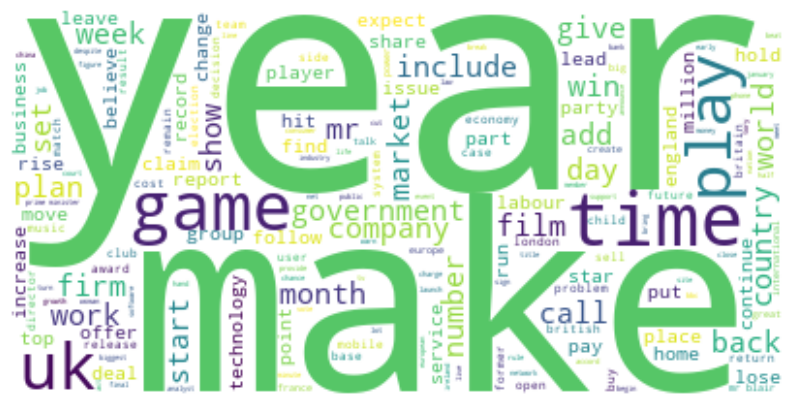

In [67]:
#Check with wordclouds again just to be sure!
display_cloud(train_df['Clean_text'])

## Transforming the Corpus!!

Now at this stage the data is successfully cleaned and all redundant noises are removed. These steps are generic to any NLP pipeline which reduces the dimension of the data. Once the data is cleaned , we can again prune some words to their base form and reduce the sentence lengths. This is important because when we are applying any model (statistical, deep learning,  transformers,graphs), 2 different words from the same base word are encoded and tokenized in a different manner. For instance, the word "watched" and "watching" have the same root word "watch", however they are encoded separately with respect to any Tokenizer.


To alleviate this issue, it is recommended to perform lemmatization on the text corpus so that the words can be reduced to their root semantic word. Morphological transformations such as "watched" and "watching", are converted to their base form through this method. Stemming , although can be used , is not recommended as it does not take into consideration the semantics of the sentence or the surrounding words which are present around it.Stemming also produces words which are not present in the vocabulary.

For an in depth study of the same, please refer to the [Stanford documentation](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)

For trying out stemming, you can use my porter stemmer [library](https://github.com/abhilash1910/Classic_Stemmer)

But for now, we will be using NLTK for our lemmatization purposes. So [lets, get started!](http://www.nltk.org/api/nltk.stem.html?highlight=lemmatizer)



In [68]:
#Lemmatize the dataset
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

# Function to map POS tag to WordNet POS tag
def get_wordnet_pos(tag):
    if tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # default to NOUN

#Lemmatize the dataset`
def lemma_corpus(data):
    lemmatizer=WordNetLemmatizer()

    # Tokenize and get POS tags
    tokens = word_tokenize(data)
    pos_tags = nltk.pos_tag(tokens)

    # Lemmatize with correct POS tags
    lemmatized_words = [
        lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags
    ]

    return " ".join(lemmatized_words)

In [69]:
%%time
train_df['Clean_text']=train_df['Clean_text'].apply(lambda z: lemma_corpus(z))

CPU times: user 8.61 s, sys: 185 ms, total: 8.79 s
Wall time: 8.84 s


In [70]:
#For example let us try to stem them and check  a sample

from nltk.stem import *

def stem_traincorpus(data):
    stemmer = PorterStemmer()
    out_data=""
    for words in data:
        out_data+= stemmer.stem(words)
    return out_data

In [71]:
%%time
train_df['Clean_text']=train_df['Clean_text'].apply(lambda z: stem_traincorpus(z))

CPU times: user 447 ms, sys: 9.38 ms, total: 457 ms
Wall time: 458 ms


## End of Dataset Preparation

At this stage , we have covered the dataset preparation part of the pipeline. At this stage we have analysed the dataset , got an initial estimate about the words in the corpus. We performed cleaning, statistical analysis as well as lemmatization to prepare the dataset for EDA and successive steps. 

## Converting the labels to Numerics

Here we convert the labels into numbers (0-4) values , which will be helpful when we apply tensor compression or dimensionality reduction algorithms for visualizing the vectors.

In [72]:
category_label = {}
for index, category in enumerate(train_df["Category"].unique()):
    print(index, ':', category)
    category_label.update({category : index})

0 : business
1 : tech
2 : politics
3 : sport
4 : entertainment


In [73]:
train_df["Label"] = train_df["Category"].map(lambda x : category_label[x])

In [74]:
train_df#[["ArticleId", "Text", "clean_text", "Category", "Label"]]

,ArticleId,Text,Category,Clean_text,Label,Token_length,Count_punctuations,Stop_words,No_of_urls
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom ex bos launch defence lawyer defend f...,0,301,22,103,0
1,154,german business confidence slides german busin...,business,german business confidence slide german busine...,0,325,25,117,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicate economic gloom citizen major...,0,514,36,214,0
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster well fu...,1,634,42,273,0
4,917,enron bosses in $168m payout eighteen former e...,business,enron bos payout eighteen former enron directo...,0,355,31,135,0
...,...,...,...,...,...,...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment,double eviction big brother model caprice holb...,4,223,22,96,0
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment,dj double act revamp chart show dj duo jk joel...,4,558,35,228,0
1487,1590,weak dollar hits reuters revenues at media gro...,business,weak dollar hit reuters revenue medium group r...,0,237,24,89,0
1488,1587,apple ipod family expands market apple has exp...,tech,apple ipod family expand market apple expand i...,1,560,33,235,0


In [75]:
train_df.to_csv("data/train_data_cleaned.csv", index=False)
# train_df.to_csv("data/clean_data.csv", index=False)

In [76]:
train_df.head()

,ArticleId,Text,Category,Clean_text,Label,Token_length,Count_punctuations,Stop_words,No_of_urls
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom ex bos launch defence lawyer defend f...,0,301,22,103,0
1,154,german business confidence slides german busin...,business,german business confidence slide german busine...,0,325,25,117,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicate economic gloom citizen major...,0,514,36,214,0
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster well fu...,1,634,42,273,0
4,917,enron bosses in $168m payout eighteen former e...,business,enron bos payout eighteen former enron directo...,0,355,31,135,0


In [84]:
s = set()

for i in train_df["Clean_text"]:
    s.add(i)

In [87]:
# validation : looking for unique characters in the cleaned text
s_unqiue = set()
for i in train_df["Clean_text"]:
    s_unqiue.update(set(i))

s_unqiue

{' ',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z'}